# Netflix userbase Dataset 

Kaggle link [Click here](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

About Dataset
The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity. Each row represents a unique user, identified by their User ID. The dataset includes information such as the user's subscription type (Basic, Standard, or Premium), the monthly revenue generated from their subscription, the date they joined Netflix (Join Date), the date of their last payment (Last Payment Date), and the country in which they are located.


## Importing 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Data

In [29]:
df=pd.read_csv('Netflix Userbase.csv')
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [30]:
df.shape

(2500, 10)

In [31]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [33]:
df.duplicated().sum()

0

In [34]:
df.describe(include='object').T
    

,count,unique,top,freq
Subscription Type,2500,3,Basic,999
Join Date,2500,300,05-11-22,33
Last Payment Date,2500,26,28-06-23,164
Country,2500,10,United States,451
Gender,2500,2,Female,1257
Device,2500,4,Laptop,636
Plan Duration,2500,1,1 Month,2500


## Data Preparation

In [35]:
Netflix_df=df.drop(['User ID','Plan Duration'],axis=1)  # Drop column that are useless

In [36]:
Netflix_df['Join Date']=pd.to_datetime(Netflix_df['Join Date']) # convert object type to Datetime columns
Netflix_df['Last Payment Date']=pd.to_datetime(Netflix_df['Last Payment Date'])

In [37]:
Netflix_df['Year']=Netflix_df['Join Date'].dt.year # Extract Year from join Date
Netflix_df['Month number']=Netflix_df['Join Date'].dt.month # Extract Month number form join Date
Netflix_df['Month name']=Netflix_df['Join Date'].dt.strftime('%b') # Extract Month name form join Date
Netflix_df.set_index('Join Date',inplace=True) # Set index to join Date

In [38]:
Netflix_df.head(5)

,Subscription Type,Monthly Revenue,Last Payment Date,Country,Age,Gender,Device,Year,Month number,Month name
Join Date,,,,,,,,,,
2022-01-15,Basic,10,2023-10-06,United States,28,Male,Smartphone,2022,1,Jan
2021-05-09,Premium,15,2023-06-22,Canada,35,Female,Tablet,2021,5,May
2023-02-28,Standard,12,2023-06-27,United Kingdom,42,Male,Smart TV,2023,2,Feb
2022-10-07,Standard,12,2023-06-26,Australia,51,Female,Laptop,2022,10,Oct
2023-01-05,Basic,10,2023-06-28,Germany,33,Male,Smartphone,2023,1,Jan


## EDA

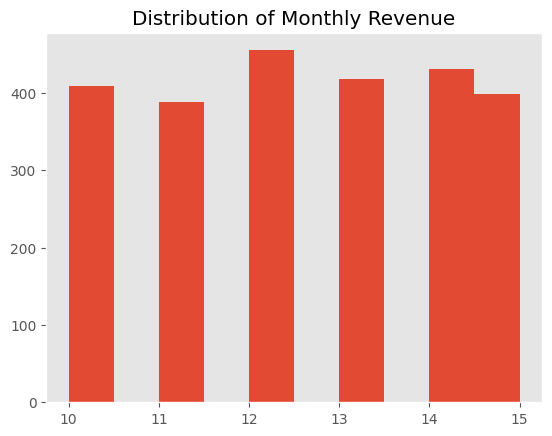

In [39]:
Netflix_df['Monthly Revenue'].hist(grid=False) # histogram plot
plt.title('Distribution of Monthly Revenue')
plt.show()

*  A uniform distribution is observed in subscription-based revenue.
*  Subscription models often provide consistent pricing for users over time.
*  The stable and steady income stream from subscriptions leads to uniform revenue distribution.
*  Predictability and stability make subscription-based models attractive for businesses.
*  Uniform distribution in revenue allows for reliable and sustainable income generation.

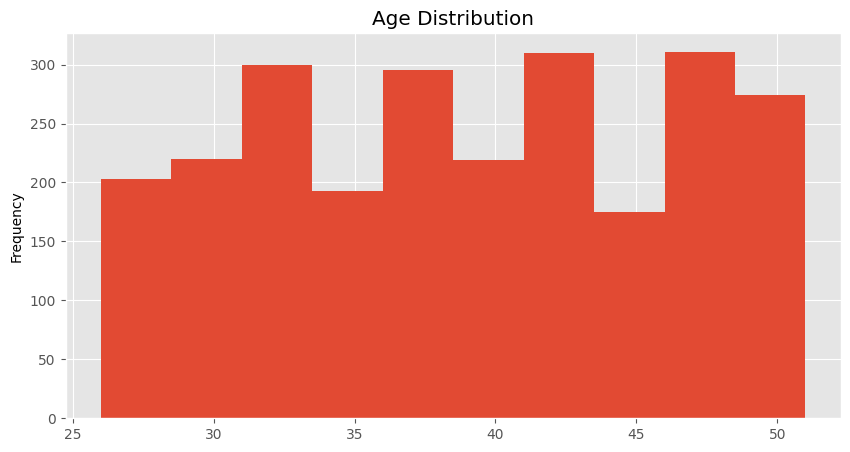

In [40]:
plt.figure(figsize=(10,5))
Netflix_df['Age'].plot(kind='hist',bins=10,title='Age Distribution') # histogram plot
plt.show()

* Certainly! Based on the histogram plot, the data does not follow a normal distribution. Instead, it exhibits a non-normal distribution with higher frequencies observed in certain age ranges, specifically between 30-35, 35-40, 40-45, and 45-50 years. 

* The distribution shows some concentration of data points in these specific age groups, suggesting that the data is not symmetrically distributed around a central value, which is characteristic of a normal distribution.

In [41]:
Monthlyrevenue=Netflix_df.groupby(['Month number','Month name'])['Monthly Revenue'].sum().reset_index()
Monthlyrevenue_Gender=Netflix_df.groupby(['Month number','Month name','Gender'])['Monthly Revenue'].sum().reset_index()


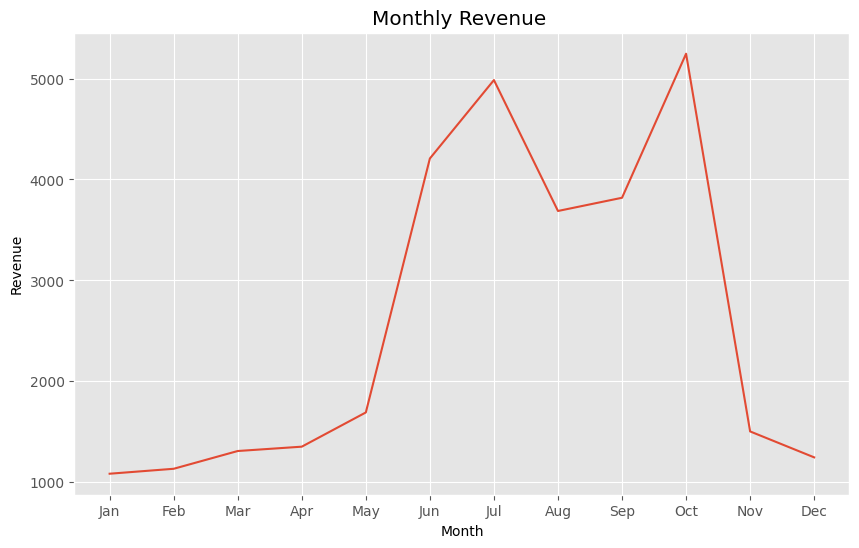

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month name', y='Monthly Revenue', data=Monthlyrevenue, sort=False, markers=True) # line plot Revenue over month
plt.title('Monthly Revenue ')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks()
plt.show()

* There is a Raise from June to October
* Drop at November

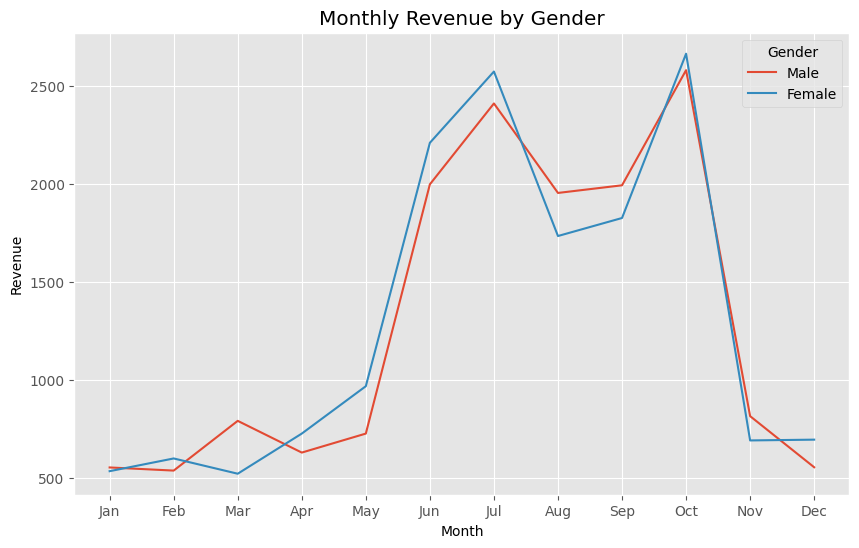

In [43]:
plt.figure(figsize=(10, 6)) # Line plot revenue by Gender
sns.lineplot(x='Month name', y='Monthly Revenue', hue='Gender', data=Monthlyrevenue_Gender, hue_order=["Male", "Female"], sort=False, markers=True)
plt.title('Monthly Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks()
plt.show()

* There is a subtle competitive trend between males and females regarding monthly revenue, implying some level of competition between the two groups.
* However, overall, the revenue pattern remains relatively stable over time for both genders.
* The revenue performance for males and females is quite consistent, and any fluctuations are not substantial enough to alter the general revenue trend.

<Axes: >

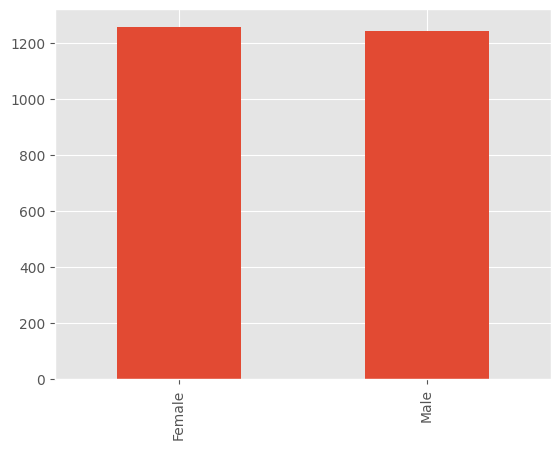

In [44]:
Netflix_df['Gender'].value_counts().plot(kind='bar')

* The number of male and female users is equal

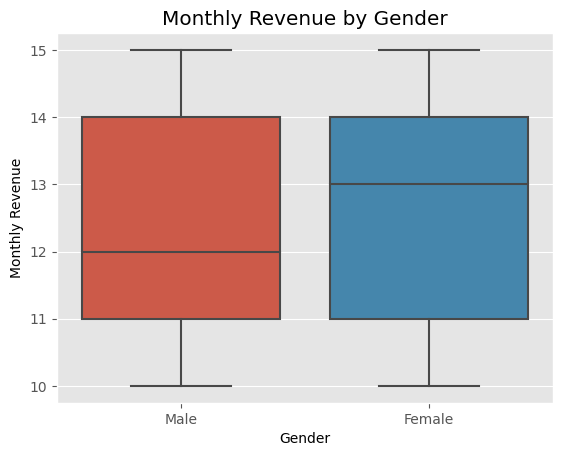

In [45]:
sns.boxplot(x='Gender', y='Monthly Revenue', data=Netflix_df) # Box plot
plt.title('Monthly Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Revenue')
plt.show()

###  Users Count of Subscriptions by Type

In [46]:
Subscription_Gender=Netflix_df.groupby(['Subscription Type','Gender'])['Monthly Revenue'].agg(['sum','count']).reset_index()
Subscription=Subscription_Gender.groupby('Subscription Type').sum(numeric_only=True).reset_index()

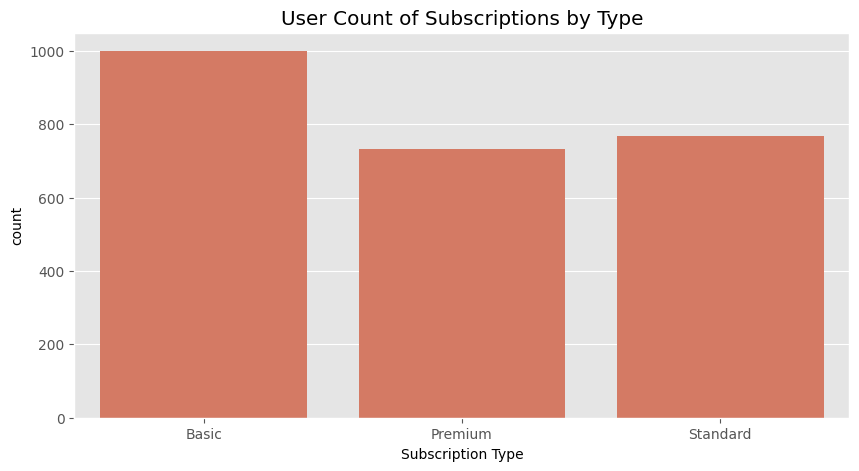

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data = Subscription ,x='Subscription Type',y='count',color='#e76f51')
plt.title('User Count of Subscriptions by Type')
plt.show()

* User of Basic plan are higher than other plan

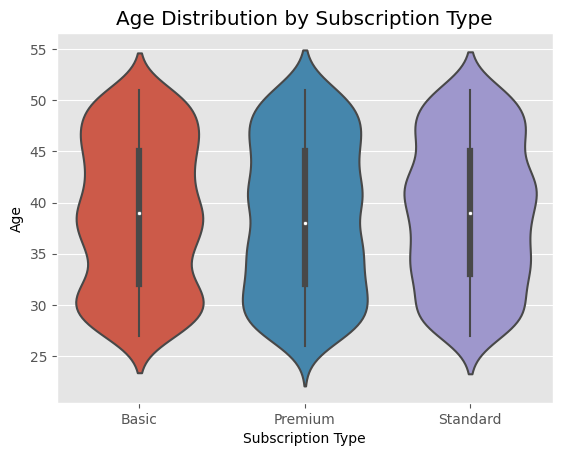

In [48]:
sns.violinplot(x='Subscription Type', y='Age', data=Netflix_df) # Violinplot
plt.title('Age Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.show()

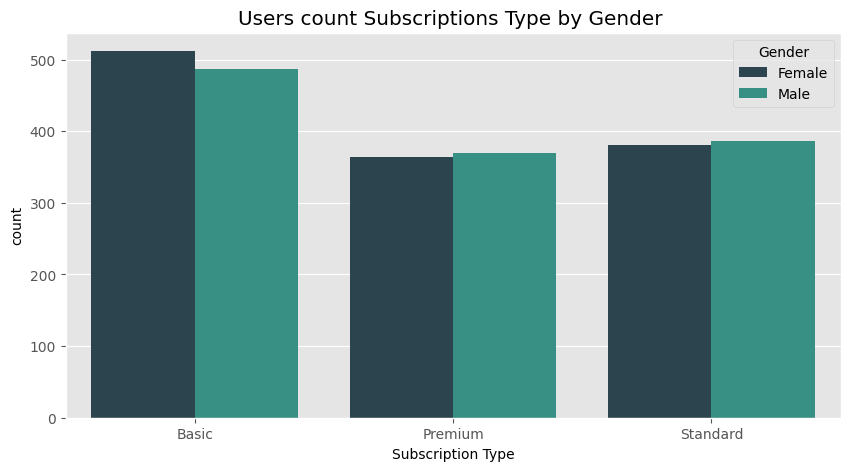

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data = Subscription_Gender ,x='Subscription Type',y='count',hue='Gender',palette=['#264653','#2a9d8f'])
plt.title('Users count Subscriptions Type by Gender ')
plt.show()

* In the Basic plan, female users outnumber male users.
* For the Premium and Standard plans, the number of male users is slightly higher than female users.

### Users by Country

In [50]:
Country_users=Netflix_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'User'})

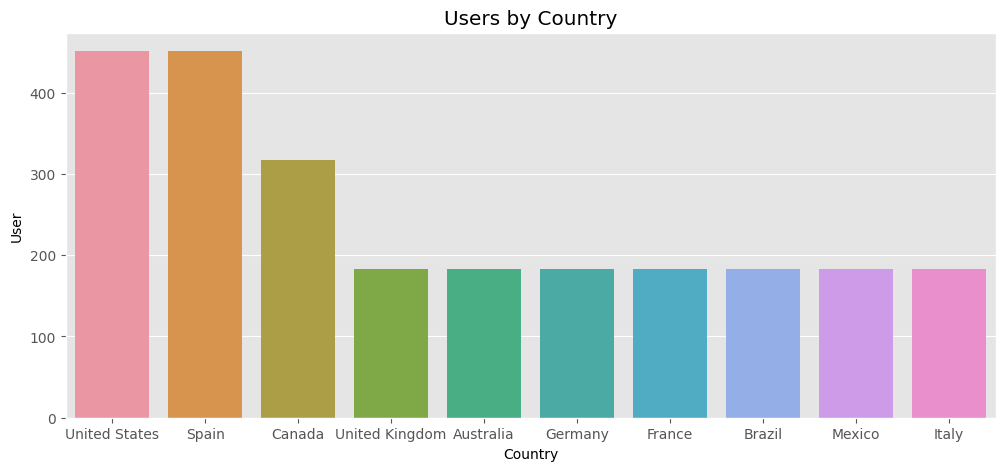

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(data = Country_users ,x='Country',y='User')
plt.title('Users by Country')
plt.show()

* The United States and Spain have the highest number of users compared to other countries.
* Excluding the United States, Spain, and Canada, the remaining countries have a similar number of users.
* The user count in the United States, Spain, and Canada stands out, contributing significantly to the overall user base.

### Conclusion
Based on the analysis of the Netflix Userbase Dataset, we identified significant variations in gender distribution, age demographics, and subscription types, providing actionable insights for targeted marketing campaigns and tailored content offerings in the competitive streaming industry.